In [2]:
import datetime, warnings, scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
flightsinfo = pd.read_csv("flights.csv")

In [7]:
list(flightsinfo.columns) 

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

In [8]:
airport = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')

In [9]:
flightsinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332420 entries, 0 to 2332419
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  float64
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             float64
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    float64
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             float64
 24

In [10]:
flightsinfo.shape

(2332420, 31)

In [11]:
flightsinfo.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,2332420.0,2.332420e+06,2.332420e+06,2.332420e+06,2.332420e+06,2.332419e+06,2.281203e+06,2.281203e+06,2.279954e+06,2.279954e+06,...,2.332419e+06,2.278293e+06,2.273584e+06,2.332419e+06,2.332419e+06,447203.000000,447203.000000,447203.000000,447203.000000,447203.000000
mean,2015.0,3.001552e+00,1.530177e+01,3.920830e+00,2.212780e+03,1.327548e+03,1.335321e+03,9.564441e+00,1.610641e+01,1.358011e+03,...,1.499375e+03,1.484078e+03,5.188389e+00,2.539852e-03,2.268503e-02,13.527731,0.059510,18.326326,22.743179,3.149279
std,0.0,1.399672e+00,8.569885e+00,1.981082e+00,1.780452e+03,4.787265e+02,4.906983e+02,3.704553e+01,9.182326e+00,4.916444e+02,...,4.993482e+02,5.185873e+02,3.950190e+01,5.033292e-02,1.488974e-01,26.861192,1.829829,46.705840,42.222315,21.434376
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-6.800000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,2.000000e+00,8.000000e+00,2.000000e+00,7.440000e+02,9.200000e+02,9.240000e+02,-5.000000e+00,1.100000e+01,9.390000e+02,...,1.115000e+03,1.106000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,3.000000e+00,1.500000e+01,4.000000e+00,1.691000e+03,1.322000e+03,1.330000e+03,-1.000000e+00,1.400000e+01,1.343000e+03,...,1.522000e+03,1.517000e+03,-4.000000e+00,0.000000e+00,0.000000e+00,3.000000,0.000000,2.000000,3.000000,0.000000
75%,2015.0,4.000000e+00,2.300000e+01,6.000000e+00,3.395000e+03,1.727000e+03,1.737000e+03,8.000000e+00,1.900000e+01,1.750000e+03,...,1.918000e+03,1.917000e+03,9.000000e+00,0.000000e+00,0.000000e+00,18.000000,0.000000,18.000000,28.000000,0.000000
max,2015.0,5.000000e+00,3.100000e+01,7.000000e+00,9.794000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1101.000000,241.000000,1971.000000,1331.000000,1152.000000


In [12]:
flightsinfo.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5.0,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10.0,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20.0,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20.0,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25.0,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
flightsinfo

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5.0,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10.0,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20.0,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20.0,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25.0,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332415,2015,5,28,4,AS,571,N581AS,SAN,PDX,1525.0,...,1736.0,-14.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2332416,2015,5,28,4,AS,892,N513AS,HNL,SAN,1525.0,...,2340.0,-18.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2332417,2015,5,28,4,B6,1685,N635JB,BOS,PIT,1525.0,...,1704.0,-1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2332418,2015,5,28,4,DL,1378,N321NB,ATL,ORF,1525.0,...,1746.0,36.0,0.0,0.0,NaN,10.0,0.0,0.0,0.0,26.0


In [14]:
airlinecompanies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [15]:
airlinecompanies

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

In [ ]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
flightsinfo['DELAY_LEVEL'] = flightsinfo['DEPARTURE_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(x="AIRLINE", hue='DELAY_LEVEL', data=flightsinfo, palette= ["#00FF00","#FFA500","#FF0000"])

labels = ax.get_xticklabels()
ax.set_xticklabels(labels)
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
ax.xaxis.label.set_visible(False)
plt.ylabel('No. of Flights', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

C:\Users\saidi\AppData\Local\Temp\ipykernel_14272\3270147513.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="AIRLINE", y="DEPARTURE_DELAY", data=flightsinfo, color="orange", ci=None)
C:\Users\saidi\AppData\Local\Temp\ipykernel_14272\3270147513.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="AIRLINE",y="ARRIVAL_DELAY",  data=flightsinfo, color="b", hatch = 'X',


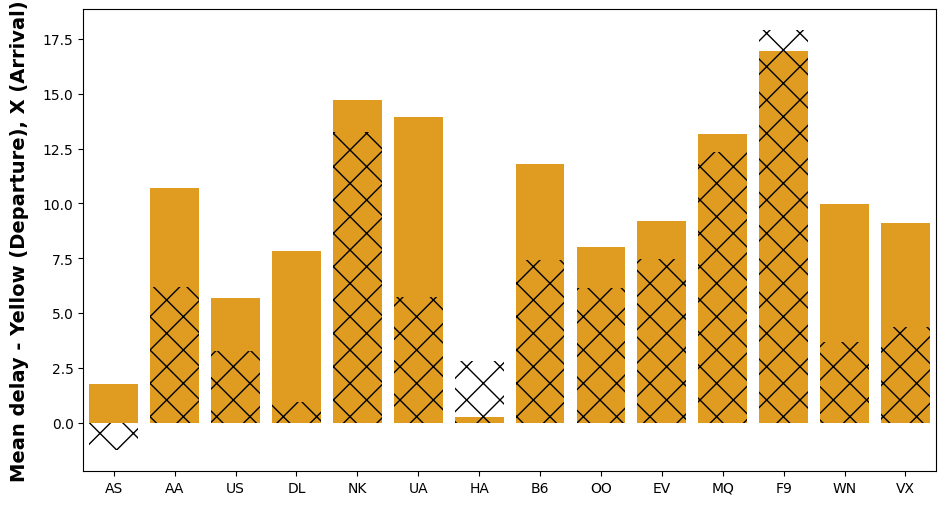

In [13]:
fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="AIRLINE", y="DEPARTURE_DELAY", data=flightsinfo, color="orange", ci=None)
ax = sns.barplot(x="AIRLINE",y="ARRIVAL_DELAY",  data=flightsinfo, color="b", hatch = 'X',
                 alpha = 0.0, ci=None)
labels = ax.get_xticklabels()
ax.set_xticklabels(labels)
ax.xaxis.label.set_visible(False)
plt.ylabel('Mean delay - Yellow (Departure), X (Arrival)',
           fontsize=14, weight = 'bold', labelpad=10);

In [1]:
#!apt-get install libgeos-3.5.0
#!apt-get install libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip
from mpl_toolkits.basemap import Basemap

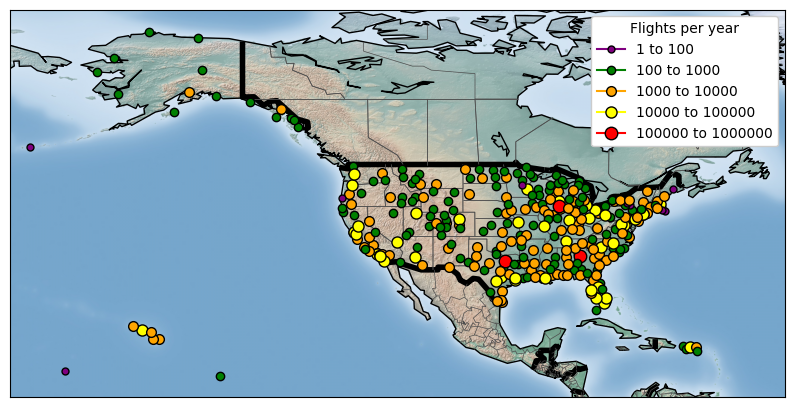

In [15]:
import matplotlib.pyplot as plt
from collections import OrderedDict
from mpl_toolkits.basemap import Basemap

# Get flight counts for each airport
flightcount = flightsinfo['ORIGIN_AIRPORT'].value_counts()

plt.figure(figsize=(10, 10))

colors = ['purple', 'green', 'orange', 'yellow', 'red', 'lightblue']
size = [1, 100, 1000, 10000, 100000, 1000000]
labels = ["1 to 100", "100 to 1000", "1000 to 10000", "10000 to 100000", "100000 to 1000000"]

# Create a Basemap
map = Basemap(llcrnrlon=-180, urcrnrlon=-50, llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth=4)
map.drawstates(color='0.3')

# Loop through airport data
for index, (code, y, x) in airport[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    # Check if the airport code exists in flightcount
    if code in flightcount:
        x, y = map(x, y)
        isize = [i for i, val in enumerate(size) if val < flightcount[code]]
        ind = isize[-1] if isize else 0  # Default to 0 if no size found
        map.plot(x, y, marker='o', markersize=ind + 5, markeredgewidth=1,
                 color=colors[ind], markeredgecolor='k', label=labels[ind])

# Create the legend
handles, labels = plt.gca().get_legend_handles_labels()
labels_ord = OrderedDict(zip(labels, handles))
keys = ('1 to 100', '100 to 1000', '1000 to 10000', '10000 to 100000', '100000 to 1000000')
lnew = OrderedDict()
for item in keys:
    if item in labels_ord:
        lnew[item] = labels_ord[item]
plt.legend(lnew.values(), lnew.keys(), loc=1, prop={'size': 10}, title='Flights per year', frameon=True, framealpha=1)
plt.show()

In [16]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [17]:
airport = airport.dropna(subset = ['LATITUDE','LONGITUDE'])

In [18]:
airport.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [19]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [20]:
flightsinfo_NULL = flightsinfo.isnull().sum()*100/flightsinfo.shape[0]
flightsinfo_NULL

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.395340
ORIGIN_AIRPORT          0.000043
DESTINATION_AIRPORT     0.000043
SCHEDULED_DEPARTURE     0.000043
DEPARTURE_TIME          2.195874
DEPARTURE_DELAY         2.195874
TAXI_OUT                2.249423
WHEELS_OFF              2.249423
SCHEDULED_TIME          0.000300
ELAPSED_TIME            2.522530
AIR_TIME                2.522530
DISTANCE                0.000043
WHEELS_ON               2.320637
TAXI_IN                 2.320637
SCHEDULED_ARRIVAL       0.000043
ARRIVAL_TIME            2.320637
ARRIVAL_DELAY           2.522530
DIVERTED                0.000043
CANCELLED               0.000043
CANCELLATION_REASON    97.731498
AIR_SYSTEM_DELAY       80.826652
SECURITY_DELAY         80.826652
AIRLINE_DELAY          80.826652
LATE_AIRCRAFT_DELAY    80.826652
WEATHER_DE

I drop all the rows for some attributes which have null values as they make up a small percentage of the dataset


In [21]:
flightsinfo1 = flightsinfo.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [22]:
flightsinfo1.shape

(2273584, 32)

In [23]:
flightsinfo1.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    2273584
AIR_SYSTEM_DELAY       1826381
SECURITY_DELAY         1826381
AIRLINE_DELAY          1826381
LATE_AIRCRAFT_DELAY    1826381
WEATHER_DELAY          1826381
DELAY_LEVEL                  0
dtype: i

In [24]:
flightsinfo_modified = flightsinfo1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
flightsinfo_modified = flightsinfo_modified.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)

In [25]:
flightsinfo_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 447203 entries, 27 to 2332418
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AIRLINE              447203 non-null  object 
 1   ORIGIN_AIRPORT       447203 non-null  object 
 2   DESTINATION_AIRPORT  447203 non-null  object 
 3   DEPARTURE_DELAY      447203 non-null  float64
 4   TAXI_OUT             447203 non-null  float64
 5   ELAPSED_TIME         447203 non-null  float64
 6   DISTANCE             447203 non-null  float64
 7   TAXI_IN              447203 non-null  float64
 8   ARRIVAL_DELAY        447203 non-null  float64
 9   AIR_SYSTEM_DELAY     447203 non-null  float64
 10  SECURITY_DELAY       447203 non-null  float64
 11  AIRLINE_DELAY        447203 non-null  float64
 12  LATE_AIRCRAFT_DELAY  447203 non-null  float64
 13  WEATHER_DELAY        447203 non-null  float64
 14  DELAY_LEVEL          447203 non-null  int64  
dtypes: float64(11), int6

In [26]:
Flight_Delays = flightsinfo_modified

Dropping all the contributing factors of delays as we are only going to focus on the over all delay

In [27]:
flightsinfo2 = flightsinfo1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [28]:
flightsinfo2.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
DELAY_LEVEL            0
dtype: int64

In [29]:
flightsinfo2.shape

(2273584, 26)

In [30]:
flightsinfo2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2273584 entries, 0 to 2332418
Data columns (total 26 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  float64
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             float64
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    float64
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             float64
 24  CAN

In [31]:
flightsinfo2.DEPARTURE_TIME.dtype

dtype('float64')

In [32]:
flightsinfo2.DEPARTURE_TIME

0          2354.0
1             2.0
2            18.0
3            15.0
4            24.0
            ...  
2332414    1521.0
2332415    1512.0
2332416    1519.0
2332417    1523.0
2332418    1551.0
Name: DEPARTURE_TIME, Length: 2273584, dtype: float64

The times are not in the correct format so i will transform them into HH:MM format


In [33]:
def CreateTimeFormatted(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [34]:
flightsinfo2['Actual_Departure'] =flightsinfo1['DEPARTURE_TIME'].apply(CreateTimeFormatted)
flightsinfo2['Actual_Departure']

0          23:54:00
1          00:02:00
2          00:18:00
3          00:15:00
4          00:24:00
             ...   
2332414    15:21:00
2332415    15:12:00
2332416    15:19:00
2332417    15:23:00
2332418    15:51:00
Name: Actual_Departure, Length: 2273584, dtype: object

In [35]:
flightsinfo2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'DELAY_LEVEL',
       'Actual_Departure'],
      dtype='object')

Transform year month and day into date time format

In [36]:
flightsinfo2['Date'] = pd.to_datetime(flightsinfo2[['YEAR','MONTH','DAY']])
flightsinfo2.Date

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
2332414   2015-05-28
2332415   2015-05-28
2332416   2015-05-28
2332417   2015-05-28
2332418   2015-05-28
Name: Date, Length: 2273584, dtype: datetime64[ns]

In [37]:
flightsinfo2['Day'] = flightsinfo2['Date'].dt

In [38]:
flightsinfo2['Actual_Departure'] =flightsinfo1['DEPARTURE_TIME'].apply(CreateTimeFormatted)
flightsinfo2['Scheduled_Arrival'] =flightsinfo1['SCHEDULED_ARRIVAL'].apply(CreateTimeFormatted)
flightsinfo2['Scheduled_Departure'] =flightsinfo1['SCHEDULED_DEPARTURE'].apply(CreateTimeFormatted)
flightsinfo2['Actual_Arrival'] =flightsinfo2['ARRIVAL_TIME'].apply(CreateTimeFormatted)

In [39]:
flightsinfo2 = flightsinfo2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [40]:
flightsinfo2 = flightsinfo2.drop(['AIRLINE_x','IATA_CODE'], axis=1)

In [41]:
flightsinfo2 = flightsinfo2.rename(columns={"AIRLINE_y":"AIRLINE"})

In [42]:
flightsinfo2 = flightsinfo2.merge(airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
flightsinfo2 = flightsinfo2.merge(airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [43]:
flightsinfo2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'DELAY_LEVEL', 'Actual_Departure', 'Date',
       'Day', 'Scheduled_Arrival', 'Scheduled_Departure', 'Actual_Arrival',
       'AIRLINE', 'IATA_CODE_x', 'AIRPORT_x', 'CITY_x', 'STATE_x', 'COUNTRY_x',
       'LATITUDE_x', 'LONGITUDE_x', 'IATA_CODE_y', 'AIRPORT_y', 'CITY_y',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [44]:
flightsinfo2 = flightsinfo2.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)

In [45]:
flightsinfo2 = flightsinfo2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [46]:
flightsinfo2

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,Scheduled_Arrival,Scheduled_Departure,Actual_Arrival,AIRLINE,Org_Airport_Code,Org_Airport_Name,Origin_city,Dest_Airport_Code,Dest_Airport_Name,Destination_city
0,2015,1,1,4,98,N407AS,ANC,SEA,5.0,2354.0,...,04:30:00,00:05:00,04:08:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
1,2015,1,1,4,108,N309AS,ANC,SEA,45.0,41.0,...,05:09:00,00:45:00,04:55:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
2,2015,1,1,4,134,N464AS,ANC,SEA,155.0,140.0,...,06:33:00,01:55:00,05:58:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
3,2015,1,1,4,114,N303AS,ANC,SEA,220.0,209.0,...,06:40:00,02:20:00,06:28:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
4,2015,1,1,4,730,N423AS,ANC,SEA,505.0,457.0,...,09:30:00,05:05:00,09:16:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269849,2015,5,26,2,2730,N907EV,MEI,PIB,1425.0,1639.0,...,14:55:00,14:25:00,17:04:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
2269850,2015,5,26,2,2734,N904EV,MEI,PIB,2046.0,2040.0,...,21:16:00,20:46:00,21:10:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
2269851,2015,5,27,3,2730,N902EV,MEI,PIB,1425.0,1644.0,...,14:55:00,14:25:00,17:21:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
2269852,2015,5,27,3,2734,N879AS,MEI,PIB,2046.0,2101.0,...,21:16:00,20:46:00,21:26:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel


In [47]:
data_vizual = pd.DataFrame(flightsinfo2[['AIRLINE','Org_Airport_Name','Origin_city',
                               'Dest_Airport_Name','Destination_city','ORIGIN_AIRPORT',
                               'DESTINATION_AIRPORT','DISTANCE','Actual_Departure','Date','Day',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT','DIVERTED',]])

In [48]:
flightsinfo2.DEPARTURE_TIME.dtype

dtype('float64')

In [49]:
data_vizual = data_vizual.dropna(subset = ['Actual_Departure','Actual_Arrival'])

In [50]:
data_vizual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2268761 entries, 0 to 2269853
Data columns (total 22 columns):
 #   Column               Dtype         
---  ------               -----         
 0   AIRLINE              object        
 1   Org_Airport_Name     object        
 2   Origin_city          object        
 3   Dest_Airport_Name    object        
 4   Destination_city     object        
 5   ORIGIN_AIRPORT       object        
 6   DESTINATION_AIRPORT  object        
 7   DISTANCE             float64       
 8   Actual_Departure     object        
 9   Date                 datetime64[ns]
 10  Day                  object        
 11  Scheduled_Departure  object        
 12  DEPARTURE_DELAY      float64       
 13  Actual_Arrival       object        
 14  Scheduled_Arrival    object        
 15  ARRIVAL_DELAY        float64       
 16  SCHEDULED_TIME       float64       
 17  ELAPSED_TIME         float64       
 18  AIR_TIME             float64       
 19  TAXI_IN              float

In [51]:
Flights = data_vizual
Flights

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,169.0,4.0,21.0,0.0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,00:41:00,2015-01-01,...,-4.0,04:55:00,05:09:00,-14.0,204.0,194.0,173.0,4.0,17.0,0.0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,01:40:00,2015-01-01,...,-15.0,05:58:00,06:33:00,-35.0,218.0,198.0,170.0,11.0,17.0,0.0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,02:09:00,2015-01-01,...,-11.0,06:28:00,06:40:00,-12.0,200.0,199.0,176.0,8.0,15.0,0.0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,04:57:00,2015-01-01,...,-8.0,09:16:00,09:30:00,-14.0,205.0,199.0,179.0,4.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269849,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69.0,16:39:00,2015-05-26,...,134.0,17:04:00,14:55:00,129.0,30.0,25.0,15.0,3.0,7.0,0.0
2269850,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69.0,20:40:00,2015-05-26,...,-6.0,21:10:00,21:16:00,-6.0,30.0,30.0,16.0,2.0,12.0,0.0
2269851,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69.0,16:44:00,2015-05-27,...,139.0,17:21:00,14:55:00,146.0,30.0,37.0,20.0,4.0,13.0,0.0
2269852,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69.0,21:01:00,2015-05-27,...,15.0,21:26:00,21:16:00,10.0,30.0,25.0,15.0,3.0,7.0,0.0


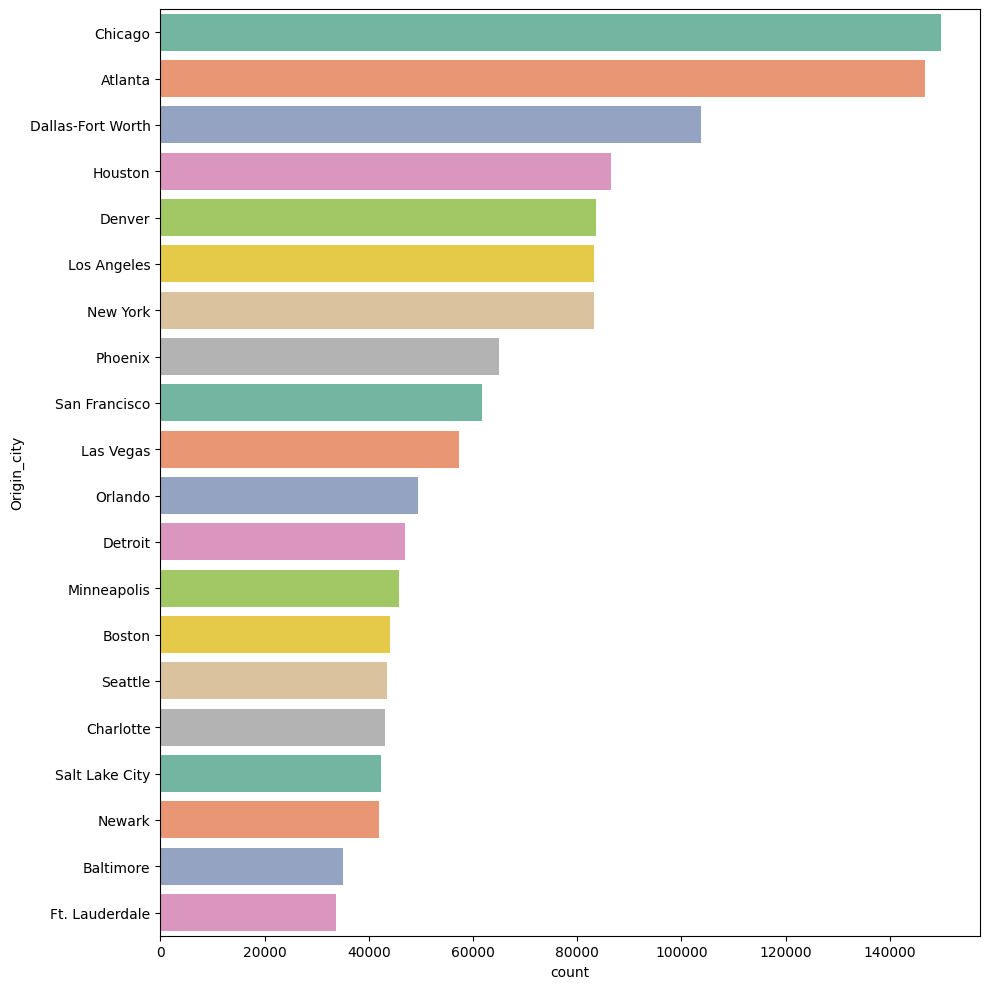

In [52]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(y=Flights['Origin_city'], data = Flights,
              order=Flights['Origin_city'].value_counts().iloc[:20].index,palette="Set2")
axis.set_yticklabels(axis.get_yticklabels())
plt.tight_layout()
plt.show()

C:\Users\saidi\AppData\Local\Temp\ipykernel_14272\2928879733.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",data = Flights, dodge=True, jitter=True,palette="Set1")


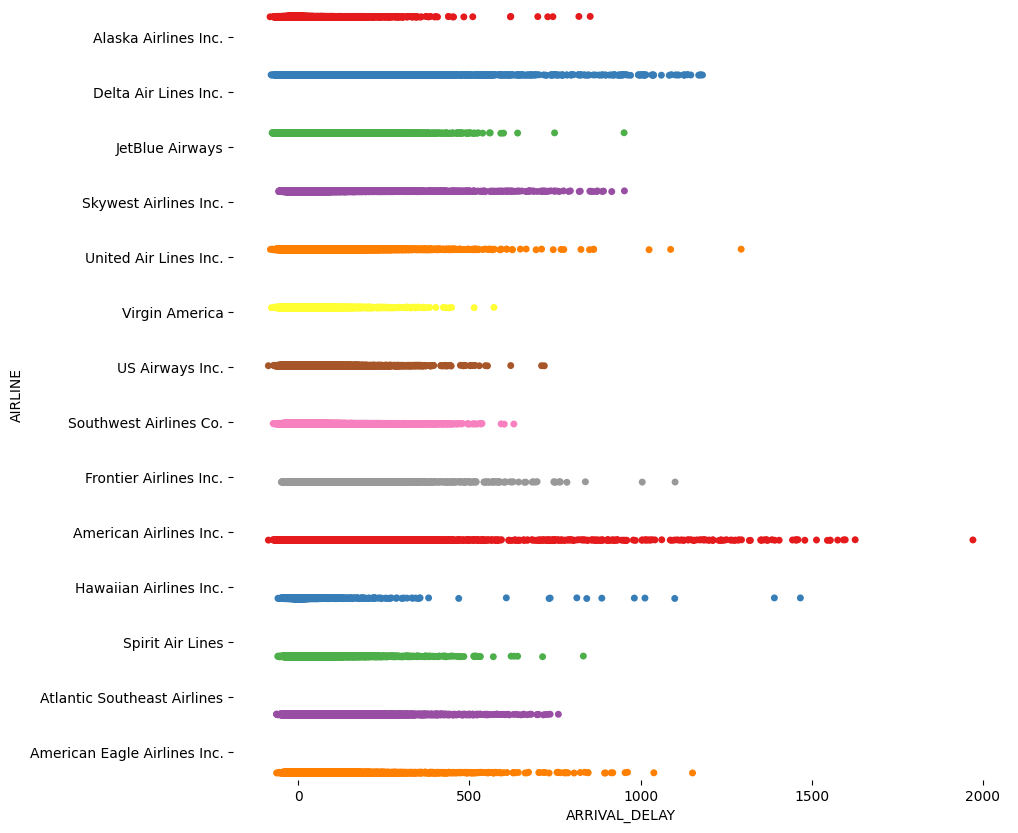

In [53]:
axis = plt.subplots(figsize=(10,10))
sns.despine(bottom=True, left=True)
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",data = Flights, dodge=True, jitter=True,palette="Set1")
plt.show()

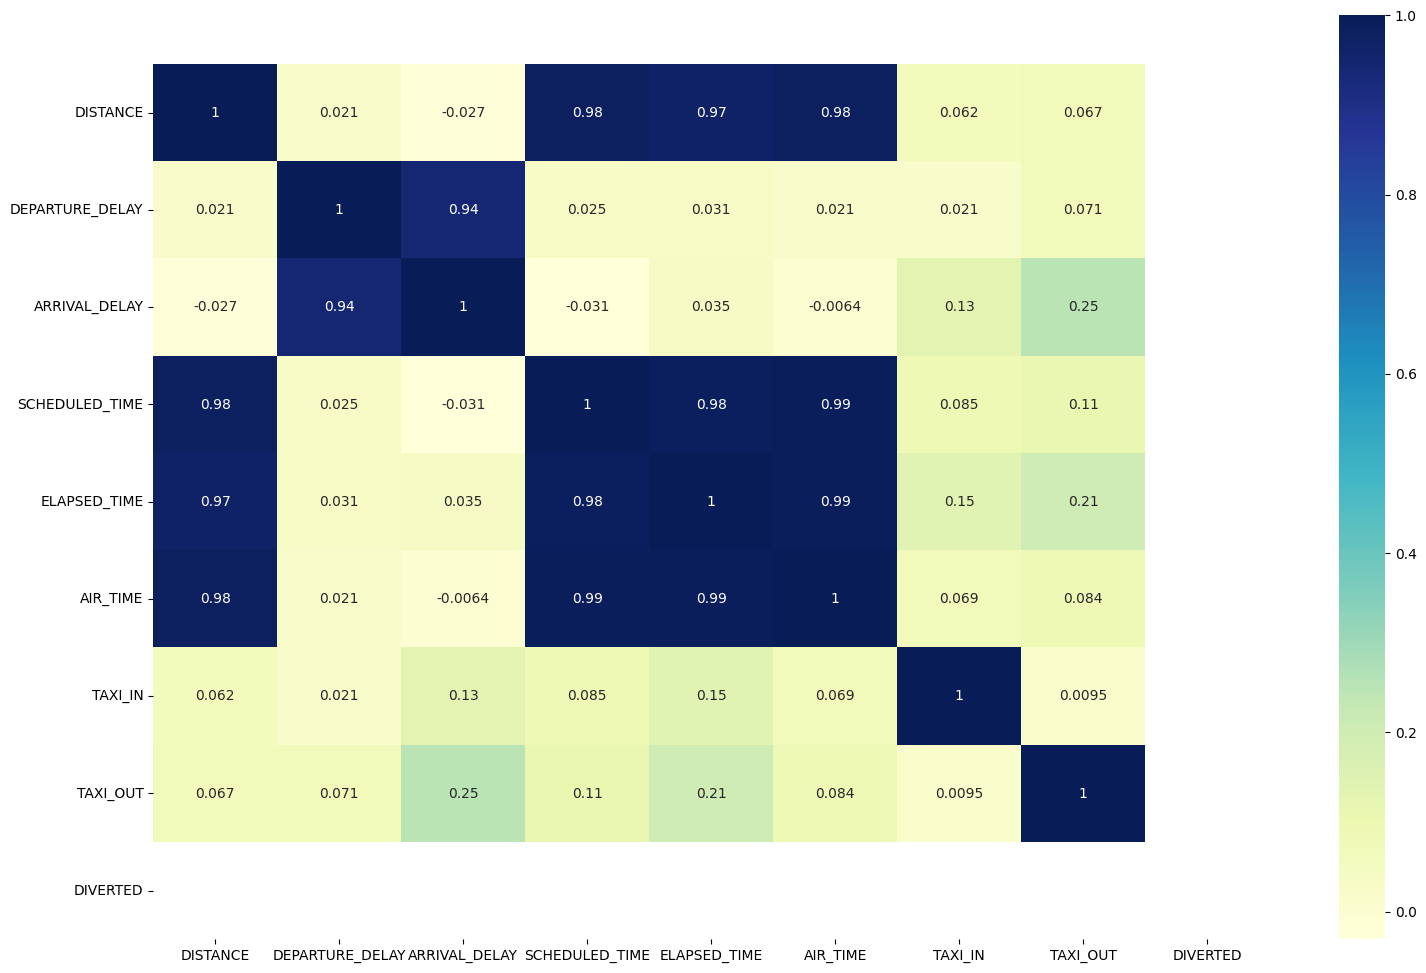

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Flights is your DataFrame

# Select only numeric columns for correlation
numeric_flights = Flights.select_dtypes(include=['number'])

# Create a subplot
plt.figure(figsize=(18, 12))

# Generate the heatmap for correlation
sns.heatmap(numeric_flights.corr(), annot=True, cmap="YlGnBu")

# Adjust the y-axis limits
b, t = plt.ylim()  # discover the values for bottom and top
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

# Show the plot
plt.show()


In [56]:
Flights.head()

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,169.0,4.0,21.0,0.0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,00:41:00,2015-01-01,...,-4.0,04:55:00,05:09:00,-14.0,204.0,194.0,173.0,4.0,17.0,0.0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,01:40:00,2015-01-01,...,-15.0,05:58:00,06:33:00,-35.0,218.0,198.0,170.0,11.0,17.0,0.0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,02:09:00,2015-01-01,...,-11.0,06:28:00,06:40:00,-12.0,200.0,199.0,176.0,8.0,15.0,0.0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,04:57:00,2015-01-01,...,-8.0,09:16:00,09:30:00,-14.0,205.0,199.0,179.0,4.0,16.0,0.0


Removing columns that are not needed for prediction

In [57]:
Flights1 = Flights.drop(['Org_Airport_Name','Origin_city','Dest_Airport_Name','Destination_city'],axis = 1)

In [58]:
Flights1.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE',
       'Actual_Departure', 'Date', 'Day', 'Scheduled_Departure',
       'DEPARTURE_DELAY', 'Actual_Arrival', 'Scheduled_Arrival',
       'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'TAXI_IN', 'TAXI_OUT', 'DIVERTED'],
      dtype='object')

Air Time distribution histogram

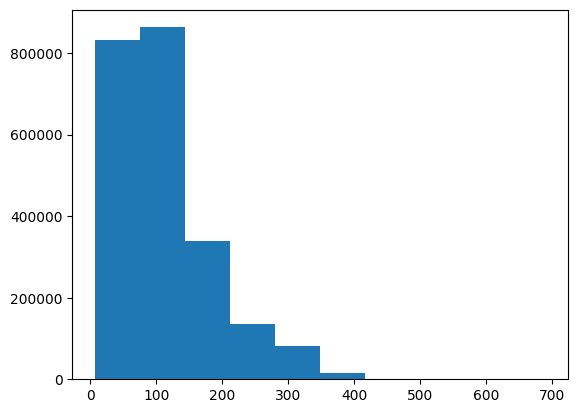

In [59]:
plt.hist(Flights1['AIR_TIME'])
plt.show()

Elapsed Time distribution histogram

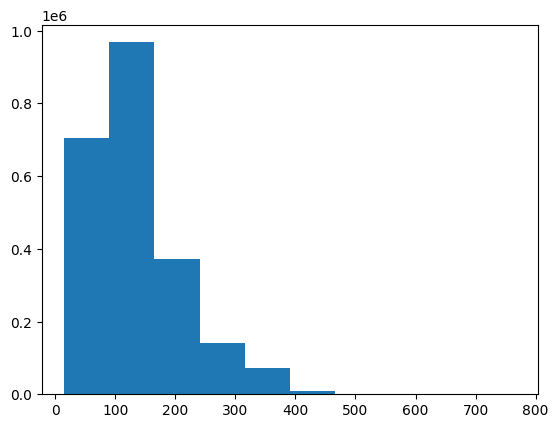

In [60]:
plt.hist(Flights1['ELAPSED_TIME'])
plt.show()




**Regression Starts to predict Arrival Delay**

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()

Applying Label encoder to convert text values to numbers

In [63]:
Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])
Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])
Flights1['Day'] = le.fit_transform(Flights1['Day'])

In [63]:
Flights1 = Flights1.drop(['Scheduled_Departure','Scheduled_Arrival','Actual_Arrival','Date','Actual_Departure'], axis = 1)

In [64]:
Flights1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5219244 entries, 0 to 5221999
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   AIRLINE              int32  
 1   ORIGIN_AIRPORT       int32  
 2   DESTINATION_AIRPORT  int32  
 3   DISTANCE             int64  
 4   Day                  int32  
 5   DEPARTURE_DELAY      float64
 6   ARRIVAL_DELAY        float64
 7   SCHEDULED_TIME       float64
 8   ELAPSED_TIME         float64
 9   AIR_TIME             float64
 10  TAXI_IN              float64
 11  TAXI_OUT             float64
 12  DIVERTED             int64  
dtypes: float64(7), int32(4), int64(2)
memory usage: 606.8 MB


In [65]:
X = Flights1.drop('ARRIVAL_DELAY',axis = 1)
X.shape

(5219244, 12)

In [66]:
y = Flights1['ARRIVAL_DELAY']
y.head()

0   -22.0
1   -14.0
2   -35.0
3   -12.0
4   -14.0
Name: ARRIVAL_DELAY, dtype: float64

Split into train and test sets

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)

Applying Standard Scalar

In [68]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

Applying Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
LinR = LinearRegression()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

fitResult = LinR.fit(X_train_sc,y_train)
y_pred = fitResult.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, y_pred))
print ('MSE:' , mean_squared_error(y_test, y_pred))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, y_pred)))
print ('R2:' , r2_score(y_test, y_pred))

MAE: 1.5327895576705654e-06
MSE: 3.0655780798924036e-06
RMSE: 0.0017508792305274523
R2: 0.9999999980588673


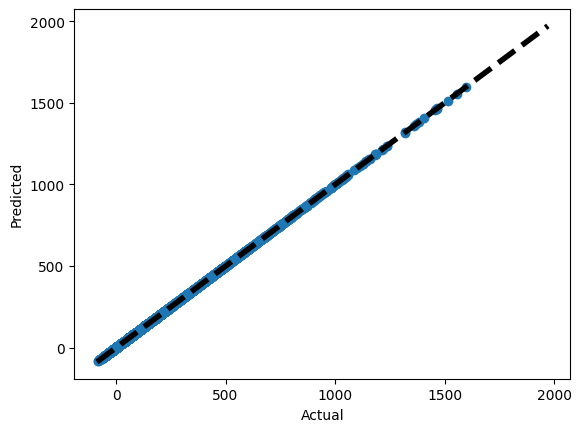

In [70]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

Applying Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor
Rfc = RandomForestRegressor(random_state=2)
fitResultR = Rfc.fit(X_train_sc,y_train)
predictedValues = fitResultR.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

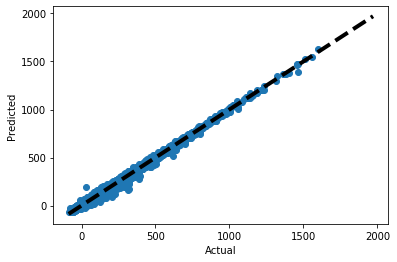

In [0]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

Applying Decision Tree Regressor

In [0]:
from sklearn.tree import DecisionTreeRegressor
Dtc = DecisionTreeRegressor(random_state = 2)

fitResultdtc = Dtc.fit(X_train_sc,y_train)
predictedValues = fitResultdtc.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 0.9508833080039945
MSE: 8.578144267637228
RMSE: 2.928846917754021
R2: 0.994568294675817


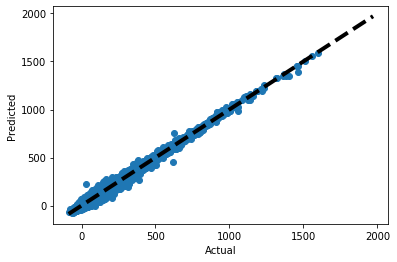

In [0]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

Applying Boosted Linear Regression

In [0]:
from sklearn.ensemble import AdaBoostRegressor
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=2)

fitResultBl = Boost_Lin.fit(X_train_sc,y_train)
predictedValues = fitResultBl.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 1.5327891007407566e-06
MSE: 3.06557807989065e-06
RMSE: 0.0017508792305269516
R2: 0.9999999980588673


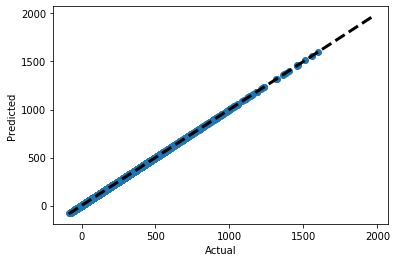

In [0]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

**Dropping Departure delay from set of attributes to try and predict Arrival Delay**

In [0]:
X = Flights1.drop(['ARRIVAL_DELAY','DEPARTURE_DELAY'],axis = 1)
X.shape

(5219244, 11)

In [0]:
y = Flights1['DEPARTURE_DELAY']
y.head()

0   -11.0
1    -4.0
2   -15.0
3   -11.0
4    -8.0
Name: DEPARTURE_DELAY, dtype: float64

In [0]:
X

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,0,17,275,1448,4,205.0,194.0,169.0,4.0,21.0,0
1,0,17,275,1448,4,204.0,194.0,173.0,4.0,17.0,0
2,0,17,275,1448,4,218.0,198.0,170.0,11.0,17.0,0
3,0,17,275,1448,4,200.0,199.0,176.0,8.0,15.0,0
4,0,17,275,1448,4,205.0,199.0,179.0,4.0,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5221995,3,195,239,69,5,34.0,25.0,17.0,2.0,6.0,0
5221996,3,195,239,69,6,34.0,23.0,14.0,5.0,4.0,0
5221997,3,195,239,69,6,34.0,34.0,18.0,4.0,12.0,0
5221998,3,195,239,69,4,34.0,30.0,18.0,3.0,9.0,0


In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

Applying MLP Neural Network

In [0]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=0, activation='relu', hidden_layer_sizes=16)

mlp.fit(X_train_sc, y_train)

predictedValues = mlp.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 18.92521792240611
MSE: 1376.49885439204
RMSE: 37.10119747921945
R2: 0.013987506217613577


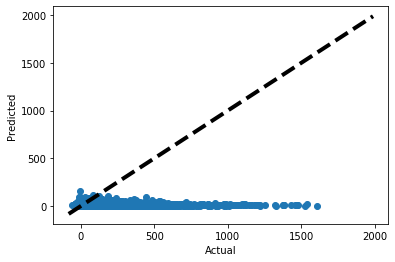

In [0]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

Applying Random Forest Regressor

In [0]:
fitResultR = Rfc.fit(X_train_sc,y_train)
predictedValues = fitResultR.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 21.26184747054497
MSE: 1619.6116813587962
RMSE: 40.2443993787806
R2: -0.16015886813142388


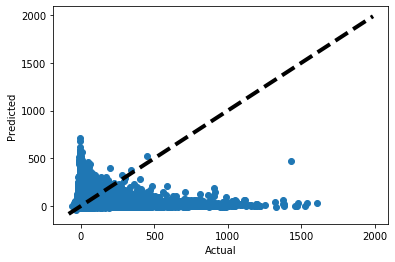

In [0]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

Applying Boosted Linear Regression

In [0]:
fitResultBl = Boost_Lin.fit(X_train_sc,y_train)
predictedValues = fitResultBl.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 45.71286920536943
MSE: 3566.753313338386
RMSE: 59.72230164133316
R2: -1.554933713144766


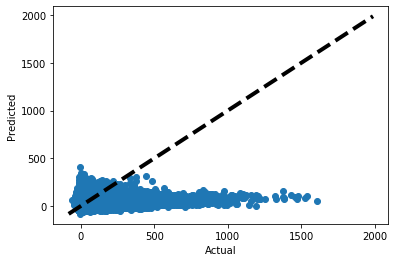

In [0]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

In [0]:
X_test

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
1331801,4,275,20,2182,5,281.0,252.0,230.0,6.0,16.0,0
4905297,9,113,283,1046,2,150.0,145.0,129.0,6.0,10.0,0
236036,11,227,237,1440,0,234.0,207.0,192.0,3.0,12.0,0
5220003,3,20,77,83,0,42.0,41.0,21.0,3.0,17.0,0
3904446,11,20,66,226,5,74.0,83.0,44.0,9.0,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...
3322861,1,66,39,728,4,120.0,126.0,96.0,7.0,23.0,0
1200682,2,11,86,285,2,78.0,66.0,49.0,5.0,12.0,0
1256422,8,227,215,334,6,95.0,94.0,60.0,9.0,25.0,0
310169,1,175,222,2486,6,343.0,335.0,313.0,5.0,17.0,0


In [0]:
Flights1

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,DEPARTURE_DELAY,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,0,17,275,1448,4,-11.0,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,0,17,275,1448,4,-4.0,-14.0,204.0,194.0,173.0,4.0,17.0,0
2,0,17,275,1448,4,-15.0,-35.0,218.0,198.0,170.0,11.0,17.0,0
3,0,17,275,1448,4,-11.0,-12.0,200.0,199.0,176.0,8.0,15.0,0
4,0,17,275,1448,4,-8.0,-14.0,205.0,199.0,179.0,4.0,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221995,3,195,239,69,5,-9.0,-18.0,34.0,25.0,17.0,2.0,6.0,0
5221996,3,195,239,69,6,101.0,90.0,34.0,23.0,14.0,5.0,4.0,0
5221997,3,195,239,69,6,10.0,10.0,34.0,34.0,18.0,4.0,12.0,0
5221998,3,195,239,69,4,-14.0,-18.0,34.0,30.0,18.0,3.0,9.0,0


In [0]:
Flights1['ORIGIN_AIRPORT'] = Flights1['ORIGIN_AIRPORT'].astype(str)
Flights1['DESTINATION_AIRPORT'] = Flights1['DESTINATION_AIRPORT'].astype(str)

In [0]:
Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])
Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])

**Creating a new feature which has value only as 0 or 1 depending on it it is dealyed or not**

In [0]:
Flights1['Is_Delayed'] = np.where(Flights1['ARRIVAL_DELAY']<=0, 0,1)

In [0]:
Flights1

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,DEPARTURE_DELAY,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED,Is_Delayed
0,0,79,196,1448,4,-11.0,-22.0,205.0,194.0,169.0,4.0,21.0,0,0
1,0,79,196,1448,4,-4.0,-14.0,204.0,194.0,173.0,4.0,17.0,0,0
2,0,79,196,1448,4,-15.0,-35.0,218.0,198.0,170.0,11.0,17.0,0,0
3,0,79,196,1448,4,-11.0,-12.0,200.0,199.0,176.0,8.0,15.0,0,0
4,0,79,196,1448,4,-8.0,-14.0,205.0,199.0,179.0,4.0,16.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221995,3,107,156,69,5,-9.0,-18.0,34.0,25.0,17.0,2.0,6.0,0,0
5221996,3,107,156,69,6,101.0,90.0,34.0,23.0,14.0,5.0,4.0,0,1
5221997,3,107,156,69,6,10.0,10.0,34.0,34.0,18.0,4.0,12.0,0,1
5221998,3,107,156,69,4,-14.0,-18.0,34.0,30.0,18.0,3.0,9.0,0,0


In [0]:
X = Flights1.drop(['ARRIVAL_DELAY','Is_Delayed'],axis = 1)
X.shape
y = Flights1['Is_Delayed']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Is_Delayed, dtype: int64

In [0]:
X

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,0,79,196,1448,4,-11.0,205.0,194.0,169.0,4.0,21.0,0
1,0,79,196,1448,4,-4.0,204.0,194.0,173.0,4.0,17.0,0
2,0,79,196,1448,4,-15.0,218.0,198.0,170.0,11.0,17.0,0
3,0,79,196,1448,4,-11.0,200.0,199.0,176.0,8.0,15.0,0
4,0,79,196,1448,4,-8.0,205.0,199.0,179.0,4.0,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5221995,3,107,156,69,5,-9.0,34.0,25.0,17.0,2.0,6.0,0
5221996,3,107,156,69,6,101.0,34.0,23.0,14.0,5.0,4.0,0
5221997,3,107,156,69,6,10.0,34.0,34.0,18.0,4.0,12.0,0
5221998,3,107,156,69,4,-14.0,34.0,30.0,18.0,3.0,9.0,0


In [0]:
y

0          0
1          0
2          0
3          0
4          0
          ..
5221995    0
5221996    1
5221997    1
5221998    0
5221999    0
Name: Is_Delayed, Length: 5219244, dtype: int64

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [0]:
y_train.value_counts()

0    2294725
1    1358745
Name: Is_Delayed, dtype: int64

Applying SMOTE to deal with class imbalance

In [0]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [0]:
pd.Series(y_train).value_counts()

1    2294725
0    2294725
dtype: int64

In [0]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

In [0]:
y_train

array([1, 0, 0, ..., 1, 1, 1])

In [0]:
X_test

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
20405,0,154,196,1107,5,-3.0,180.0,176.0,152.0,13.0,11.0,0
1235219,12,303,130,680,1,11.0,124.0,107.0,89.0,4.0,14.0,0
4232936,9,117,299,850,1,-1.0,155.0,120.0,106.0,5.0,9.0,0
3635419,7,197,74,2586,6,8.0,330.0,322.0,297.0,10.0,15.0,0
4461352,8,303,5,996,5,-4.0,173.0,173.0,148.0,3.0,22.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
509643,10,92,143,733,4,46.0,158.0,155.0,132.0,9.0,14.0,0
2137315,12,197,58,1635,1,-1.0,234.0,224.0,195.0,12.0,17.0,0
2754757,9,269,104,861,2,0.0,145.0,128.0,113.0,7.0,8.0,0
1200730,2,13,304,285,1,3.0,78.0,73.0,53.0,5.0,15.0,0


Decision trees

In [0]:
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = None)
classifierDT.fit(X_train_sc, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus
#dot_data = StringIO()
#export_graphviz(classifierDT, out_file=dot_data,  
 #               filled=True, rounded=True,
 #               special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [0]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
# Predicting the Test set results
y_pred = classifierDT.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
score = classifierDT.score(X_test_sc,y_test)

In [0]:
cm

array([[  1303, 982223],
       [    59, 582189]])

In [0]:
score

0.9826194584914554

In [0]:
print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))   

F1 score : 0.2725298912293622
Precision Score : 0.6644134619299129
Recall Score : 0.5006117468892067


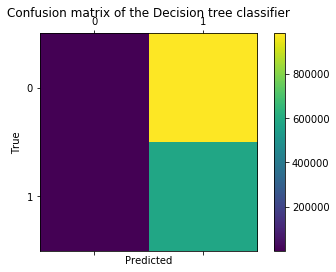

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Decision tree classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

K nearest neighbours classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier
objClassifier=KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
objClassifier.fit(X_train_sc,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
y_pred=objClassifier.predict(X_test_sc)

#Making the confussion matarix 

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

score=objClassifier.score(X_test,y_test)

In [0]:
cm

array([[925057,  58469],
       [127273, 454975]])

In [0]:
score

0.3719942980276847

In [0]:
print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))   

F1 score : 0.8696222002024336
Precision Score : 0.8825899500527832
Recall Score : 0.8609813308550668


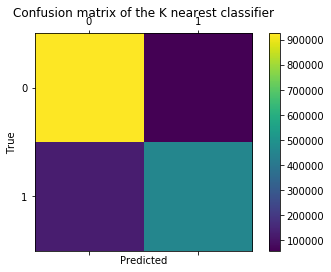

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the K nearest classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_sc, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_sc)

# Making the Confusion Matrix
score = classifier.score(X_test_sc,y_test)
cm = confusion_matrix(y_test, y_pred)

In [0]:
cm

array([[983526,      0],
       [     0, 582248]])

In [0]:
score

1.0

In [0]:
print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))   

F1 score : 1.0
Precision Score : 1.0
Recall Score : 1.0


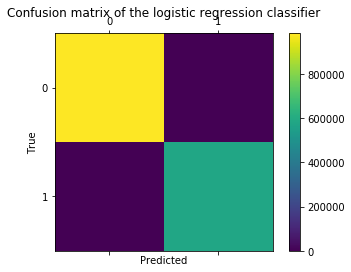

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the logistic regression classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Applying Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
objclassifierGNB=GaussianNB()
objclassifierGNB.fit(X_train_sc,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
# Predicting the Test set results
y_pred = objclassifierGNB.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
score = objclassifierGNB.score(X_test_sc,y_test)

In [0]:
cm

array([[448999, 534527],
       [102122, 480126]])

In [0]:
score

0.8399379476220706

In [0]:
print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))   

F1 score : 0.5932358674791114
Precision Score : 0.6439468109120337
Recall Score : 0.6405635447128896


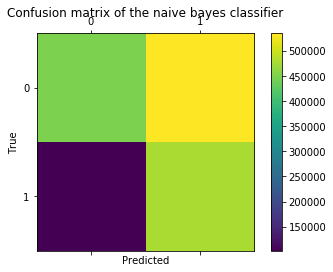

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the naive bayes classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()